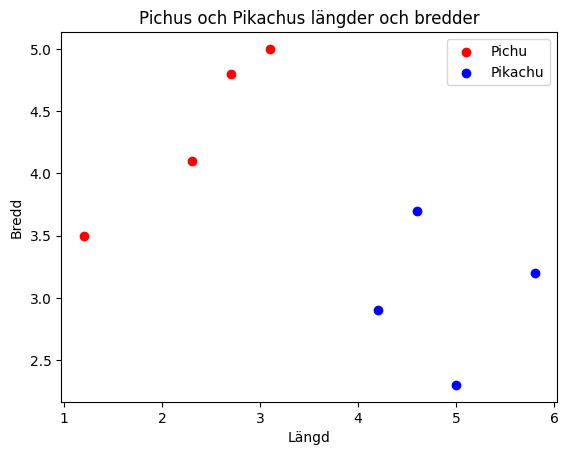

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[1.2, 3.5, 0],
                 [2.3, 4.1, 0],
                 [3.1, 5.0, 0],
                 [2.7, 4.8, 0],
                 [5.0, 2.3, 1],
                 [4.2, 2.9, 1],
                 [5.8, 3.2, 1],
                 [4.6, 3.7, 1]])

pichu_data = data[data[:, 2] == 0]
pikachu_data = data[data[:, 2] == 1]    

plt.scatter(pichu_data[:, 0], pichu_data[:, 1], color='red', label='Pichu')
plt.scatter(pikachu_data[:, 0], pikachu_data[:, 1], color='blue', label='Pikachu')
plt.xlabel('Längd')
plt.ylabel('Bredd')
plt.legend()
plt.title('Pichus och Pikachus längder och bredder')
plt.show()

#Sen när vi lägger in en testpunkt så kommer vi beräkna distance till de andra punkterna och den närmsta ska vi då koppla testpunkten till antingen 1 eller 0. 

In [7]:

text_path = r"C:\Users\Noah7\code\Github\Python-Noah-Eliasson-OPA23\labb_1\pikachu.txt"
with open(text_path, "r") as file:
    raw_text = file.read()

print(raw_text)

(width (cm), height (cm))
(18.137772263313835, 44.951493566608946)
(26.648661832322336, 41.49878057639454)
(26.180524428318897, 39.38100083914504)
(24.44364396490554, 40.175758410355904)
(21.201902279430513, 36.21004195868266)
(25.691541582957697, 37.24697337031557)
(19.338626083150515, 38.38085562147455)
(23.21718300802926, 40.88308718457233)
(23.444684475950478, 37.30114732596577)
(29.445791130252964, 37.20217384451559)
(28.51023528453833, 35.709930860090324)
(21.16066860901309, 41.31102957270099)
(24.00703335660358, 37.28941783811155)
(20.143822566361578, 44.054200130061275)
(28.951534072137846, 43.59635400253747)
(28.4462228380412, 35.70857349888654)
(21.581337497383593, 37.380046343689955)
(25.66739393839206, 41.68977778296281)
(25.30764253725807, 37.14236807370439)
(19.834071222595618, 36.32311848725025)
(27.150129600901813, 44.35514240580671)
(24.472548361435507, 40.710430933252844)
(27.3435177435667, 39.726710263117944)
(24.36424406634213, 42.846194242907536)
(18.00686275353532

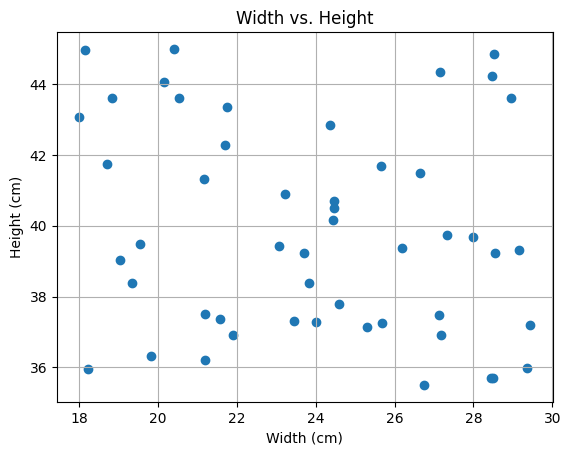

In [13]:
import numpy as np 


pikachu_data = "pikachu.txt"
pichu_data = "pichu.txt"

with open(pikachu_data, "r") as file:
    lines = file.readlines()



data = []
for line in lines[1:]:
    values = line.strip().split(",")
    width = float(values[0].strip("()"))
    height = float(values[1].strip('()'))
    data.append([width, height])
    
data = np.array(data)

data_rounded = np.round(data, decimals = 2)

sorted_data = data_rounded[data_rounded[:, 0].argsort()]

plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('Width (cm)')
plt.ylabel('Height (cm)')
plt.title('Width vs. Height')
plt.grid(True)
plt.show()

Test Data Classifications: ['Pichu', 'Pichu', 'Pichu', 'Pikachu']


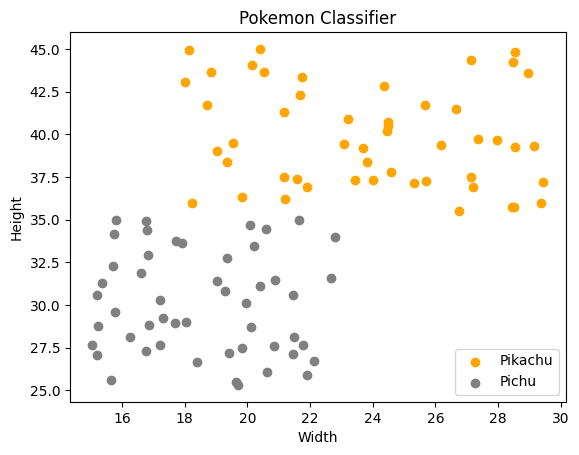

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#globally setting these variables to the two files, to then be used as arugments or values in functions/classes

pikachu_file = "pikachu.txt"
pichu_file = "pichu.txt"

class PokemonClassifier: 
    """A class which contains several functions for filereading and plotting for files, that cointans two coloumns of numeric values"""
        #Function that reads open and reads files and parses the values to int. processing the data
    def read_and_parse_data(self, filename):
        with open(filename, "r") as file:
            lines = file.readlines()
        #Open the files to then create variable, data, a list
        #ChatGPT - to parse the data from the files and slice
        #{
        data = []                                        
        for line in lines[1:]:                           #Iterate over each line starting from the second line
            values = line.strip().split(",")             #Remove any whitespaces and splits it by commas to get a list of values
            width = float(values[0].strip("()"))         #extracts the first value [0] in the file and converts it to float
            height = float(values[1].strip("()"))        #converts second value [1]
            data.append([width, height])                 #data.append appends a list containing the width and height
        #}
        return np.array(data)                            #convert the data list to a numpy array
        
    def __init__(self, pikachu_file, pichu_file):
        self.pikachu_data = self.read_and_parse_data(pikachu_file)
        self.pichu_data = self.read_and_parse_data(pichu_file)

    def plot_data(self):
        """Plotting the data files inserted as arguments in the PokemonClassifier class"""
        pikachu_widths = self.pikachu_data[:, 0]  # Extracting widths of Pikachu
        pikachu_heights = self.pikachu_data[:, 1]  # Extracting heights of Pikachu
    
        pichu_widths = self.pichu_data[:, 0]  # Extracting widths of Pichu
        pichu_heights = self.pichu_data[:, 1]  # Extracting heights of Pichu

        plt.scatter(pikachu_widths, pikachu_heights, color="orange", label="Pikachu") #Scatter the data using
        plt.scatter(pichu_widths, pichu_heights, color="grey", label="Pichu")

        plt.xlabel("Width")
        plt.ylabel("Height")
        plt.title("Pokemon Classifier")
        plt.legend(loc="lower right")
    plt.show()
    

    def classify_test_data(self, test_data):
        classifications = []
        for line in test_data:
            # Extracting width and height from the line
            values = line.strip().split(",")
            width = float(values[0].split("(")[1])
            height = float(values[1].split(")")[0])
            test_point = np.array([width, height]) # same parsing as the function above, for the data provided by the teacher 
            
            pikachu_distances = np.linalg.norm(test_point - self.pikachu_data, axis=1) #ask kokchun, after a time chatgpt gave me this i dont know what this does. 
            pichu_distances = np.linalg.norm(test_point - self.pichu_data, axis=1)
            if np.min(pikachu_distances) < np.min(pichu_distances):
                classifications.append("Pikachu")
            else:
                classifications.append("Pichu")
        return classifications

# Test the class
classifier = PokemonClassifier(pikachu_file, pichu_file)
classifier.plot_data()

# Test data provided by the teacher
test_data = [
    "(25, 35)",
    "(15, 14)",
    "(26, 30)",
    "(22, 45)"
]

test_classifications = classifier.classify_test_data(test_data)
print("Test Data Classifications:", test_classifications)


In [13]:
arr = np.arange(12)
arr2 = np.linalg.norm(arr)
print(arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
